In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from keras.datasets import cifar10
from keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (_, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0

# Load your pre-trained model
model = load_model('/content/drive/MyDrive/ML')  # Update with the actual path

In [ ]:
from keras.utils import to_categorical

# Convert target labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)

In [ ]:
# Function to calculate cosine similarity
def calculate_cosine_similarity(model, layer_index, x_train, y_train, epochs=10):
    similarity_values_over_epochs = []

    # Get the layer weights for the specified layer index
    layer_weights = model.layers[layer_index].get_weights()[0]

    for epoch in range(epochs):
        # Train the model for one epoch using actual data
        history = model.fit(x_train, y_train, epochs=1, verbose=0)

        # Get the updated layer weights after training
        updated_layer_weights = model.layers[layer_index].get_weights()[0]

        # Calculate cosine similarity for every pair of filters for this epoch
        similarity_values = []
        for i in range(layer_weights.shape[3]):
            for j in range(i + 1, layer_weights.shape[3]):
                filter1 = layer_weights[:, :, :, i].flatten()
                filter2 = layer_weights[:, :, :, j].flatten()
                similarity = cosine_similarity([filter1], [filter2])[0][0]
                similarity_values.append(similarity)

                # Print the similarity for each filter pair
                print(f"Layer: {model.layers[layer_index].name}, Filter Pair ({i},{j}): {similarity}")

        # Store the similarity values for this epoch
        similarity_values_over_epochs.append(similarity_values)

        # Update the original layer weights with the updated weights for the next epoch
        layer_weights = updated_layer_weights

    return similarity_values_over_epochs

In [ ]:
# Specify the layer index for which you want to calculate cosine similarity
layer_index = 1  # Assuming the Conv2D layer is the second layer (index 1) in the model

# Calculate cosine similarity over 10 epochs
similarity_values_over_epochs = calculate_cosine_similarity(model, layer_index, x_train, y_train, epochs=10)

Layer: conv2d, Filter Pair (0,1): -0.026213865727186203
Layer: conv2d, Filter Pair (0,2): 0.06479281932115555
Layer: conv2d, Filter Pair (0,3): -0.2605731189250946
Layer: conv2d, Filter Pair (0,4): -0.17583894729614258
Layer: conv2d, Filter Pair (0,5): -0.293171763420105
Layer: conv2d, Filter Pair (0,6): -0.1116391122341156
Layer: conv2d, Filter Pair (0,7): -0.040544863790273666
Layer: conv2d, Filter Pair (0,8): 0.3852166533470154
Layer: conv2d, Filter Pair (0,9): 0.1929953694343567
Layer: conv2d, Filter Pair (0,10): 0.09005066007375717
Layer: conv2d, Filter Pair (0,11): 0.2292315661907196
Layer: conv2d, Filter Pair (0,12): -0.01967647485435009
Layer: conv2d, Filter Pair (0,13): -0.23380963504314423
Layer: conv2d, Filter Pair (0,14): 0.13461001217365265
Layer: conv2d, Filter Pair (0,15): 0.3565114140510559
Layer: conv2d, Filter Pair (1,2): -0.3531027138233185
Layer: conv2d, Filter Pair (1,3): -0.2800388038158417
Layer: conv2d, Filter Pair (1,4): 0.004193701781332493
Layer: conv2d, Filt

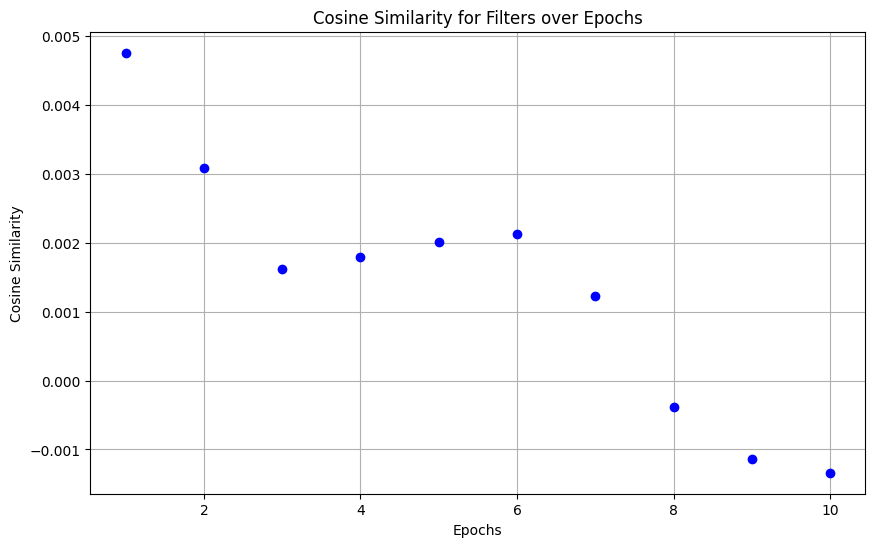

In [ ]:
# Plot cosine similarity for each epoch
plt.figure(figsize=(10, 6))
plt.title('Cosine Similarity for Filters over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cosine Similarity')
for epoch, similarity_values in enumerate(similarity_values_over_epochs, start=1):
    mean_similarity = np.mean(similarity_values)  # Calculate mean similarity for each epoch
    plt.plot(epoch, mean_similarity, marker='o', color='b')
plt.grid(True)
plt.show()